In [74]:
from numpy import loadtxt
import numpy as np
from matplotlib import pyplot  as plt
file = open("CricketData.csv", 'rb')
data = loadtxt(file, delimiter = ",")


[[ 1. 20. 89.]
 [ 1. 16. 72.]
 [ 1. 20. 93.]
 [ 1. 18. 84.]
 [ 1. 17. 81.]
 [ 1. 16. 75.]
 [ 1. 15. 70.]
 [ 1. 17. 82.]
 [ 1. 15. 69.]
 [ 1. 16. 83.]
 [ 1. 15. 80.]
 [ 1. 17. 83.]
 [ 1. 16. 81.]
 [ 1. 17. 84.]
 [ 1. 14. 76.]]


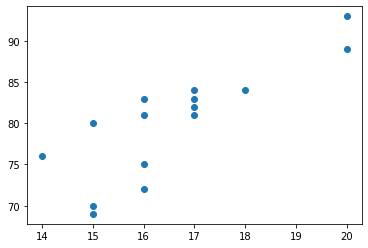

In [75]:
# add a column of ones
data = np.c_[np.ones(data.shape[0]), data]
print(data)
temperature = data[:, 1]
cpm = data[:, 2]
plt.scatter(temperature, cpm)



9013237443843230.0
weights:  [[ 135200.56093333]
 [7679636.0406    ]]
8224840495797387.0
weights:  [[ -758118.98997759]
 [-7298555.77641612]]
7505405425990386.0
weights:  [[  95280.58510514]
 [7009566.52853668]]
6848900069200839.0
weights:  [[ -719897.44867322]
 [-6658467.82128484]]
6249819899798767.0
weights:  [[  58856.35523412]
 [6398108.44132095]]
5703141878577047.0
weights:  [[ -685015.27920068]
 [-6074369.23973091]]
5204282336647115.0
weights:  [[  25622.09434379]
 [5840134.97838793]]
4749058543272936.0
weights:  [[ -653180.38387196]
 [-5541362.58460063]]
4333653635405393.0
weights:  [[-4.70122792e+03]
 [ 5.33096779e+06]]
3954584614865743.5
weights:  [[ -624126.21507912]
 [-5054978.793395  ]]
3608673144847841.0
weights:  [[ -32368.23484774]
 [4866337.72919512]]
3293018900879785.5
weights:  [[ -597609.54040294]
 [-4611139.71703073]]
3004975252803942.5
weights:  [[ -57611.27756782]
 [4442349.10084563]]
2742127073878753.5
weights:  [[ -573408.40320977]
 [-4206123.92624856]]
25022704

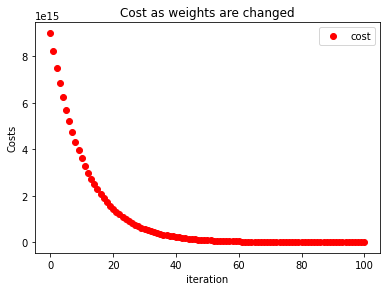

[[ 1.00000000e+00  2.00000000e+01 -1.59324843e+06]
 [ 1.00000000e+00  1.60000000e+01 -1.33947969e+06]
 [ 1.00000000e+00  2.00000000e+01 -1.59324843e+06]
 [ 1.00000000e+00  1.80000000e+01 -1.46636406e+06]
 [ 1.00000000e+00  1.70000000e+01 -1.40292187e+06]
 [ 1.00000000e+00  1.60000000e+01 -1.33947969e+06]
 [ 1.00000000e+00  1.50000000e+01 -1.27603750e+06]
 [ 1.00000000e+00  1.70000000e+01 -1.40292187e+06]
 [ 1.00000000e+00  1.50000000e+01 -1.27603750e+06]
 [ 1.00000000e+00  1.60000000e+01 -1.33947969e+06]
 [ 1.00000000e+00  1.50000000e+01 -1.27603750e+06]
 [ 1.00000000e+00  1.70000000e+01 -1.40292187e+06]
 [ 1.00000000e+00  1.60000000e+01 -1.33947969e+06]
 [ 1.00000000e+00  1.70000000e+01 -1.40292187e+06]
 [ 1.00000000e+00  1.40000000e+01 -1.21259531e+06]]


In [76]:

X = data[:, 0:-1]
Y = data[:, -1]

def calcCost(X,W,Y):
    predictions = np.dot(X,W)
    predictions = np.reshape(predictions, Y.shape)
    cost = 1/(2*len(Y))*np.sum((predictions-Y)**2)
    return cost

#3 ************ Complete the code that calculates 1/m * d/dw (cost function)
def calcGradient(X,W,Y):
    predictions = np.dot(X,W)
    cost = predictions-np.reshape(Y, (len(Y),1))
    
    #predictions = np.broadcast_to(predictions, (len(X), len(X[0])))
    grad = 1/len(Y)*(np.dot(np.reshape(cost, (len(cost[0]), len(cost))), X))
    return np.reshape(grad, (len(grad[0]), 1))

#1b ********* Call and test the createData() function, create the weights array
# =============================================================================
# X,Y use createData method to create the X,Y matrices
# Weights - Create initial weight matrix (number of weights should be the same
# as the number of features)
# Weights - should be set to 0
# =============================================================================
#   




W = np.array([[-800000],[-8000000]])

# set learning rate - the list is if we want to try multiple LR's
# We are only doing one of them today
lrList = [.3,.007]
lr = lrList[1]
#set up the cost array for graphing
costArray = []
costArray.append(calcCost(X, W, Y))
#initalize while loop flags
finished = False
count =0
print(calcCost(X,W,Y))
while (not finished and count <100):
    gradient = calcGradient(X,W,Y)
    print
    #4 *********** update weights --------------------------------
    W = W - gradient*lr
    print("weights: ", W)
    print(calcCost(X,W,Y))
    costArray.append(calcCost(X, W, Y))
    lengthOfGradientVector = np.linalg.norm(gradient)
    if (lengthOfGradientVector < .1):
        finished=True
    count+=1

# Create figure objects
fig = plt.figure()
ax = fig.add_axes([0.1,0.1,0.8,0.8])# [left, bottom, width, height]
ax.plot(np.arange(len(costArray)), costArray, "ro", label = "cost")
ax.set_title("Cost as weights are changed")
ax.set_xlabel("iteration")
ax.set_ylabel("Costs")
ax.legend()
plt.show()

#Example prediction using final weights
predictions = np.dot(X,W)
predictions = np.c_[X, predictions]
print(predictions)